In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

df = pd.read_csv("./SalaryData.csv")

In [7]:
df.shape

(30, 2)

In [8]:
# check for missing data
df.isnull().values.any()

False

In [9]:
# split the data
# This is 80/20 split and the random_state is for reproductibility
# of the result

train_set, test_set = train_test_split(df,test_size=0.2, random_state=42)
df_copy = train_set.copy()    # make a training set copy

In [10]:
df_copy.describe() # show the details

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.187500,74207.625000
std,2.943129,28240.733473
min,1.100000,37731.000000
25%,2.975000,55456.750000
50%,4.300000,62164.500000
75%,7.300000,99030.250000
max,10.500000,122391.000000


In [11]:
df_copy.corr() # show correlation between each of columns

,YearsExperience,Salary
YearsExperience,1.00000,0.98211
Salary,0.98211,1.00000


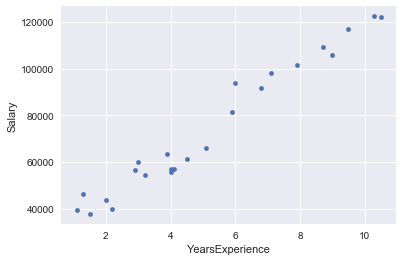

In [26]:
df_copy.plot.scatter(x='YearsExperience',y='Salary')
# from the scatter plot, it is clear that there is correlation
# Once I figure out the way to write Math equations, I will
# have the correlation equation. Check out http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/
# for details on Correlation

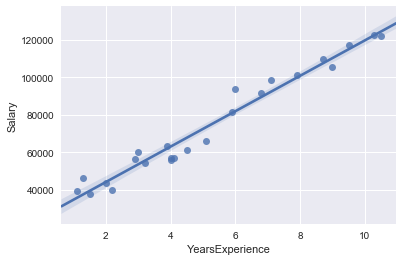

In [27]:
# Plot the Regression plot using seaborn
# Fast and easy way to get a general idea of the model

sns.regplot('YearsExperience', # horizontal axis
            'Salary',          # vertical axix
             data=df_copy)

In [28]:
# Building the model
train_set_full = train_set.copy()
train_set = train_set.drop(["Salary"], axis=1)

In [98]:
test_set_full = test_set.copy()

In [29]:
train_set_full.shape

(24, 2)

In [30]:
train_set.shape

(24, 1)

In [97]:
# create data fram of just labels
train_labels = train_set_full["Salary"]
train_labels

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
16     66029.0
5      56642.0
13     57081.0
11     55794.0
22    101302.0
1      46205.0
2      37731.0
25    105582.0
3      43525.0
21     98273.0
26    116969.0
18     81363.0
29    121872.0
20     91738.0
7      54445.0
10     63218.0
14     61111.0
19     93940.0
6      60150.0
Name: Salary, dtype: float64

In [35]:
# train the model with training data
lin_reg = LinearRegression()
lin_reg.fit(train_set,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# print the intercept and coeffecients
print("Coeffecients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coeffecients:  [9423.81532303]
Intercept:  25321.583011776813


In [99]:
test_set = test_set.drop(["Salary"], axis=1) # drop the salary from test for we will predict using the mdoel

In [100]:
# Use the model to predict salaray based on experience
salary_pred = lin_reg.predict(test_set)
salary_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [54]:
# using model with single values inputting years of experience
for i in range(11):
    salary_predn = lin_reg.predict(i)
    print("Experience years: "+ str(i) + "  " + str(salary_predn))

Experience years: 0  [25321.58301178]
Experience years: 1  [34745.39833481]
Experience years: 2  [44169.21365784]
Experience years: 3  [53593.02898087]
Experience years: 4  [63016.8443039]
Experience years: 5  [72440.65962693]
Experience years: 6  [81864.47494996]
Experience years: 7  [91288.29027299]
Experience years: 8  [100712.10559602]
Experience years: 9  [110135.92091906]
Experience years: 10  [119559.73624209]


In [103]:
# Evaluate the model
print(salary_pred)          # predicted salary
print(test_set_full["Salary"])   # actual salary

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [106]:
'''test the prediction using score which calculates the coefficient of determination
or the r^2 of the model. This can give a score between -1 and 1. Scores closer to -1
giving a negative impact on the model and scores closer to 1 give a positive 
impact to the model. The score as below is0.90 which is close to 1 which 
indicates that we have a pretty good model.
'''
lin_reg.score(test_set,test_set_full["Salary"])


0.9024461774180497

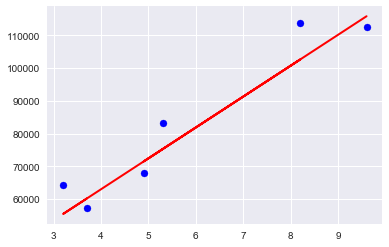

In [105]:
plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"],  color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)

In [107]:
r2_score(test_set_full["Salary"],salary_pred)

0.9024461774180497

In [95]:
# source https://www.wintellect.com/creating-a-simple-linear-regression-machine-learning-model-with-scikit-learn/